In [2]:
from cfl.experiment import Experiment
import numpy as np
import pandas as pd
from cfl.visualization.basic_visualizations import visualize_macrostates
from sklearn.preprocessing import StandardScaler
from cfl_helpers import *

2025-02-07 13:25:05.759054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
resolution = '40km'
n_clusters = 10
train_file = f'data/{resolution}_data.csv'
truth_file = f'data/{resolution}_truth.csv'

train_data = pd.read_csv(train_file)
Xraw = np.array(train_data[['lat', 'long']])
Yraw = np.array(train_data['generated_temp']).reshape(-1,1)
print(Xraw.shape, Yraw.shape)

truth = pd.read_csv(truth_file)
true_alt, true_temp = get_alt_temp_grids(truth)

(833, 2) (833, 1)


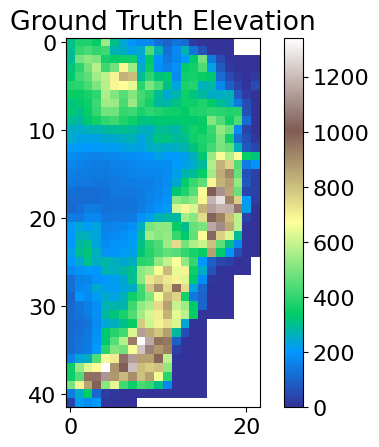

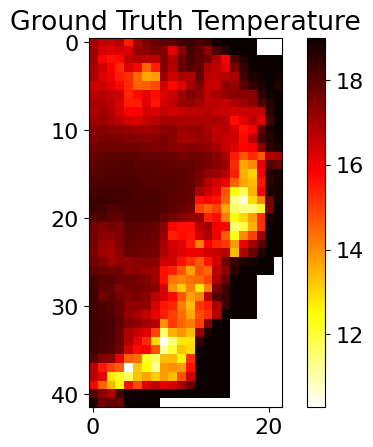

In [4]:
# PLOT TEMP AND ELEVATION FOR RAW DATAFRAME
plt.figure(1)
plt.imshow(true_alt, cmap='terrain', interpolation='nearest')
plt.colorbar()
plt.title('Ground Truth Elevation')
plt.show()

plt.figure(2)
plt.imshow(true_temp, cmap='hot_r', interpolation='nearest')
plt.colorbar()
plt.title('Ground Truth Temperature')
plt.show()

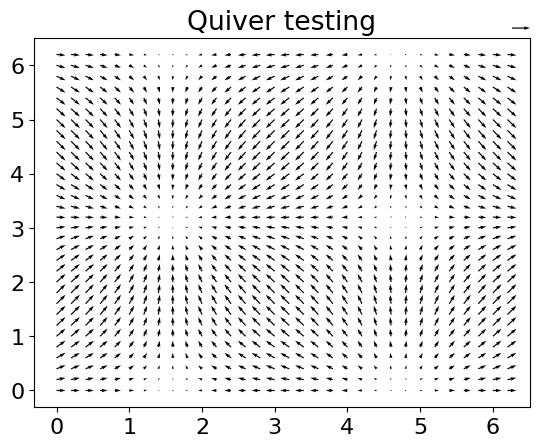

In [6]:
import matplotlib.pyplot as plt

# test out quiver
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
fig1, ax1 = plt.subplots()
ax1.set_title('Quiver testing')
Q = ax1.quiver(X, Y, U, V, units='width')
qk = ax1.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')